In [127]:
import csv
import sys
import urllib.request as req
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [128]:
dataurl = 'https://newonlinecourses.science.psu.edu/stat501/sites/onlinecourses.science.psu.edu.stat501/files/data/leukemia_remission/index.txt'
req.urlretrieve(dataurl, './leukemia_remission.txt')

('./leukemia_remission.txt', <http.client.HTTPMessage at 0x18887df9cc0>)

In [232]:
data = pd.read_csv('leukemia_remission.txt', sep="\t", encoding='utf-16', header='infer')


Pandas:
Loading csv - https://machinelearningmastery.com/load-machine-learning-data-python/
Data Frame - https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

In [233]:
print(type(data))
print(data.shape)
print(data.columns)
print(data.head())

<class 'pandas.core.frame.DataFrame'>
(27, 7)
Index(['REMISS', 'CELL', 'SMEAR', 'INFIL', 'LI', 'BLAST', 'TEMP'], dtype='object')
   REMISS  CELL  SMEAR  INFIL   LI  BLAST  TEMP
0       1   0.8   0.83   0.66  1.9   1.10  1.00
1       1   0.9   0.36   0.32  1.4   0.74  0.99
2       0   0.8   0.88   0.70  0.8   0.18  0.98
3       0   1.0   0.87   0.87  0.7   1.05  0.99
4       1   0.9   0.75   0.68  1.3   0.52  0.98


Printing selected columns from the dataframe https://stackoverflow.com/questions/11285613/selecting-multiple-columns-in-a-pandas-dataframe

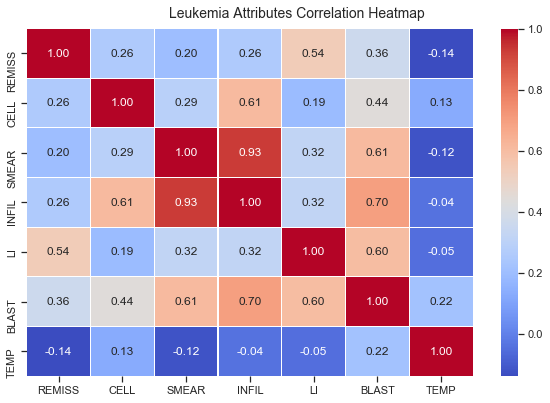

In [234]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = data.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f', linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Leukemia Attributes Correlation Heatmap', fontsize=14)

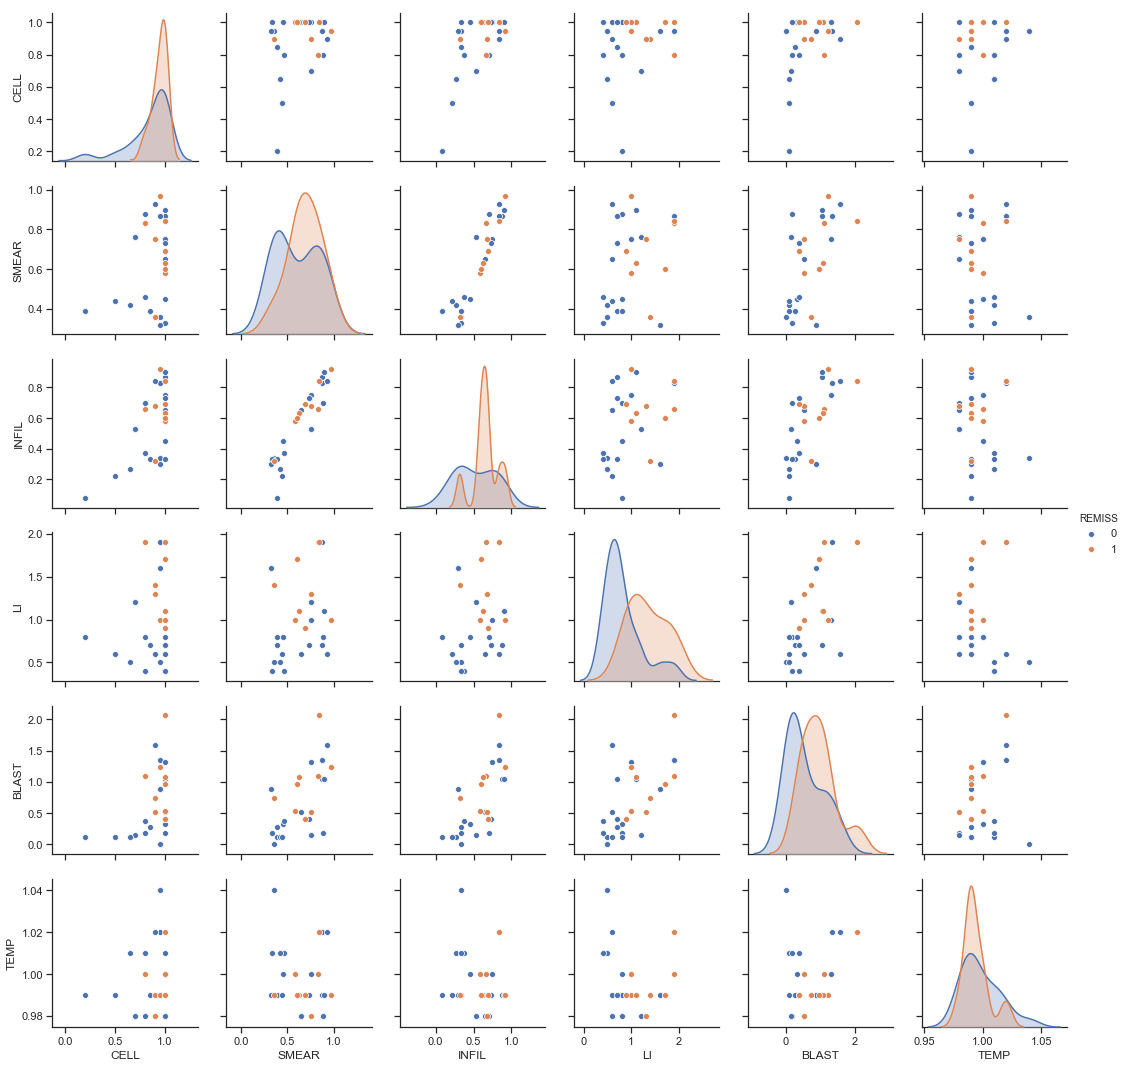

In [235]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data, vars=["CELL", "SMEAR", "INFIL", "LI", "BLAST", "TEMP"], hue='REMISS')

Ploting: https://machinelearningmastery.com/data-visualization-methods-in-python/

In [236]:
# ys = target values, first column
ys = data.iloc[:, 0]

# All independent variables except the 'REMISS' column
xs = data.iloc[:, 1:] 

print(xs.head())
print(ys.head())

# filter out records leukemia remission occured
occ = data.loc[ys == 1]

# filter out records leukemia remission not occured
noc = data.loc[ys == 0]

   CELL  SMEAR  INFIL   LI  BLAST  TEMP
0   0.8   0.83   0.66  1.9   1.10  1.00
1   0.9   0.36   0.32  1.4   0.74  0.99
2   0.8   0.88   0.70  0.8   0.18  0.98
3   1.0   0.87   0.87  0.7   1.05  0.99
4   0.9   0.75   0.68  1.3   0.52  0.98
0    1
1    1
2    0
3    0
4    1
Name: REMISS, dtype: int64


In [237]:
from sklearn.model_selection import train_test_split
xs = xs.drop(['SMEAR','TEMP'], axis=1)
print(xs.head())
(x_tr, x_te, y_tr, y_te) = train_test_split(xs, ys, stratify=ys, test_size=0.7)

   CELL  INFIL   LI  BLAST
0   0.8   0.66  1.9   1.10
1   0.9   0.32  1.4   0.74
2   0.8   0.70  0.8   0.18
3   1.0   0.87  0.7   1.05
4   0.9   0.68  1.3   0.52


In [238]:
print(x_tr.shape)
print(x_te.shape)
print(y_tr.shape)
print(y_te.shape)

(8, 4)
(19, 4)
(8,)
(19,)


In [239]:
# build the model
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(multi_class="ovr", solver="liblinear", C=0.1) 

#clf = LogisticRegressionCV(cv=5)

clf.fit(x_tr, y_tr) # train

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [240]:
# predict the values
y_prob  = clf.predict(x_te)

In [241]:
# Accuracy scores
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_te, y_prob)
print(acc * 100)

68.42105263157895


In [242]:
from sklearn.metrics import confusion_matrix 

conf_matrix = confusion_matrix(y_te, y_prob) 
print('Confusion Matrix :')
print(conf_matrix)

Confusion Matrix :
[[13  0]
 [ 6  0]]


In [244]:
from sklearn.metrics import classification_report 
print(classification_report(y_te, y_prob))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        13
           1       0.00      0.00      0.00         6

   micro avg       0.68      0.68      0.68        19
   macro avg       0.34      0.50      0.41        19
weighted avg       0.47      0.68      0.56        19



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [231]:
print(clf.coef_)

[[-0.08733469  0.04790632  0.03237453]]
